# Set up and imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import seaborn as sns
import calendar
from matplotlib.ticker import ScalarFormatter
import dask
from dask import delayed, compute

In [3]:
df = pd.read_excel('dataset.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,5.72,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,46231,ZA-2014-AS285147-41718,2014-03-20,2014-03-25,Standard Class,AS-285147,Alejandro Savely,Corporate,Harare,Harare,...,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,1.02,Medium
51286,50122,ZA-2017-HG4965147-42876,2017-05-21,2017-05-23,Second Class,HG-4965147,Henry Goldwyn,Corporate,Mutare,Manicaland,...,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,1.80,High
51287,50297,ZA-2016-EB3870147-42499,2016-05-09,2016-05-15,Standard Class,EB-3870147,Emily Burns,Consumer,Mutare,Manicaland,...,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,1.46,Medium
51288,47164,ZA-2015-JG5115147-42040,2015-02-05,2015-02-10,Standard Class,JG-5115147,Jack Garza,Consumer,Kadoma,Mashonaland West,...,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,7.46,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Product Name    51290 non-null  object        
 15  Su

# Data Exploration

## Top sellers

In [7]:
top_selling = df.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:8]

top_selling

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251


## Top revenue generators

In [9]:
top_revenue = pd.DataFrame(df.groupby('Product Name')['Sales'].sum().astype(float))
top_revenue.sort_values(by=['Sales'], inplace=True, ascending=False)
top_revenue.head(8).style.format({'Sales': '${:,.2f}'})

,Sales
Product Name,
"Apple Smart Phone, Full Size","$86,935.78"
"Cisco Smart Phone, Full Size","$76,441.53"
"Motorola Smart Phone, Full Size","$73,156.30"
"Nokia Smart Phone, Full Size","$71,904.56"
Canon imageCLASS 2200 Advanced Copier,"$61,599.82"
"Hon Executive Leather Armchair, Adjustable","$58,193.48"
"Office Star Executive Leather Armchair, Adjustable","$50,661.68"
"Harbour Creations Executive Leather Armchair, Adjustable","$50,121.52"


## Most profitable

In [11]:
most_profitable = pd.DataFrame(df.groupby(['Product Name'])['Profit'].sum().astype(float))
most_profitable.sort_values(by=['Profit'], inplace = True, ascending = False)
most_profitable.head(8).style.format({'Profit': '${:,.2f}'})

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,"$25,199.93"
"Cisco Smart Phone, Full Size","$17,238.52"
"Motorola Smart Phone, Full Size","$17,027.11"
"Hoover Stove, Red","$11,807.97"
"Sauder Classic Bookcase, Traditional","$10,672.07"
"Harbour Creations Executive Leather Armchair, Adjustable","$10,427.33"
"Nokia Smart Phone, Full Size","$9,938.20"
"Cisco Smart Phone, with Caller ID","$9,786.64"


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID')])

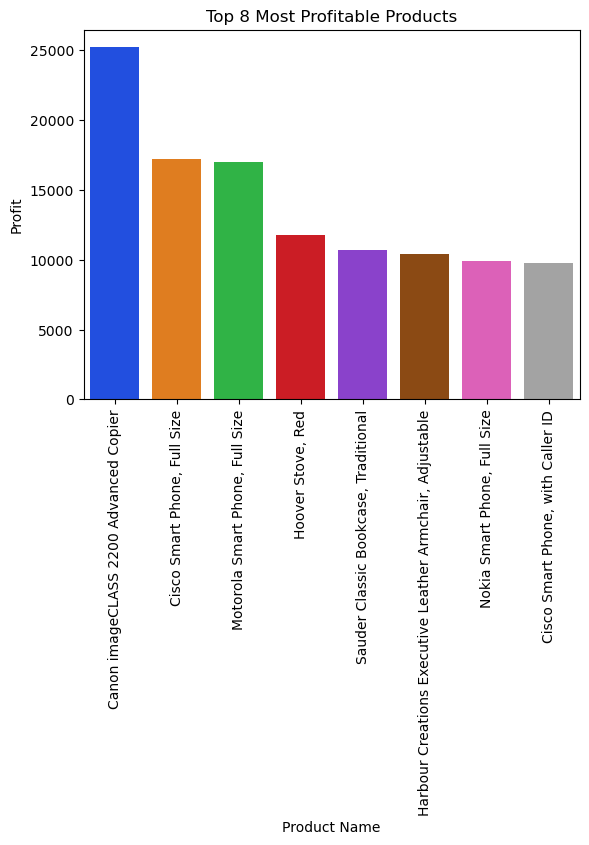

In [12]:
sns.barplot(x='Product Name',
            y='Profit',
            palette = "bright",
            data=most_profitable.head(8).reset_index()).set_title('Top 8 Most Profitable Products')
plt.xticks(rotation = 'vertical')

## Top selling categories

In [14]:
top_selling_categories = df.groupby(['Category'])['Sales'].sum().astype(float)
print(top_selling_categories.to_string(float_format='%.0f'))

Category
Furniture         4110452
Office Supplies   3787493
Technology        4744557


## Most profitable categories

In [16]:
most_profitable_category = pd.DataFrame(df.groupby(['Category'])['Profit'].sum().astype(float))
most_profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
most_profitable_category.style.format({'Profit': '${:,.2f}'})

,Profit
Category,
Technology,"$663,778.73"
Office Supplies,"$518,595.83"
Furniture,"$285,082.73"


## Sales stats by category/subcategory

In [18]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.drop(columns=['Row ID']).groupby(['Category','Sub-Category']).sum(numeric_only=True))

Sales  Quantity  Discount     Profit  \
Category        Sub-Category                                               
Furniture       Bookcases    1,466,572.24      8310    370.71 161,924.42   
                Chairs       1,501,681.76     12336    560.12 140,396.27   
                Furnishings    385,155.97     11163    475.08  46,845.43   
                Tables         757,041.92      3083    250.32 -64,083.39   
Office Supplies Appliances   1,010,535.53      6026    247.50 141,562.59   
                Art            371,613.15     16215    571.88  57,829.86   
                Binders        461,869.39     21403  1,101.88  72,433.15   
                Envelopes      169,217.49      8210    317.21  28,849.49   
                Fasteners       89,495.05      9051    356.84  13,844.29   
                Labels          73,350.28      9301    313.49  14,988.92   
                Paper          241,787.53     12672    384.50  58,111.65   
                Storage      1,126,812.97     16884    699.49 108,416.68   
                Supplies       242,811.13      8482    308.20  22,559.20   
Technology      Accessories    749,237.02     10946    370.48 129,626.31   
                Copiers      1,509,436.27      7454    260.42 258,567.55   
                Machines       779,060.07      4906    252.00  58,867.87   
                Phones       1,706,824.14     11870    489.61 216,717.01   

                              Shipping Cost  
Category        Sub-Category                 
Furniture       Bookcases        155,487.97  
                Chairs           164,253.35  
                Furnishings       40,981.66  
                Tables            79,863.39  
Office Supplies Appliances       108,307.75  
                Art               41,889.08  
                Binders           49,773.10  
                Envelopes         18,582.97  
                Fasteners         10,300.07  
                Labels             8,840.73  
                Paper             26,864.08  
                Storage          120,793.85  
                Supplies          24,950.83  
Technology      Accessories       83,592.33  
                Copiers          159,501.20  
                Machines          79,149.85  
                Phones           184,953.49

## Top selling items in each category

In [20]:
df.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3154
3,Furniture,Tables,861
4,Office Supplies,Appliances,1742
5,Office Supplies,Art,4864
6,Office Supplies,Binders,6146
7,Office Supplies,Envelopes,2387
8,Office Supplies,Fasteners,2601
9,Office Supplies,Labels,2601


## Most profitable customer segments

In [22]:
most_profitable_customer_segments = pd.DataFrame(df.groupby(['Segment'])['Profit'].sum().astype(float))
most_profitable_customer_segments.sort_values(by=['Profit'], inplace = True, ascending = False)
most_profitable_customer_segments.style.format({'Profit': '${:,.2f}'})

,Profit
Segment,
Consumer,"$749,239.78"
Corporate,"$441,208.33"
Home Office,"$277,009.18"


## Top selling markets

<Figure size 2000x2000 with 0 Axes>

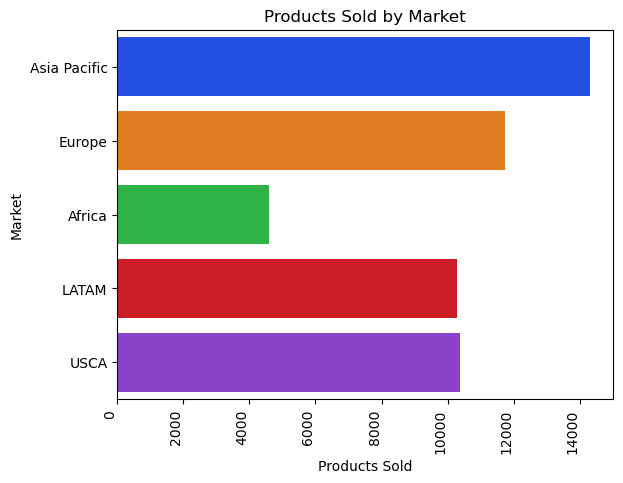

<Figure size 2000x2000 with 0 Axes>

In [24]:
sns.countplot(y='Market',data=df, palette='bright').set(xlabel='Products Sold', ylabel='Market', title='Products Sold by Market')
plt.xticks(rotation=90, ha='right')
plt.figure(figsize=(20, 20))

## Top countries by revenue

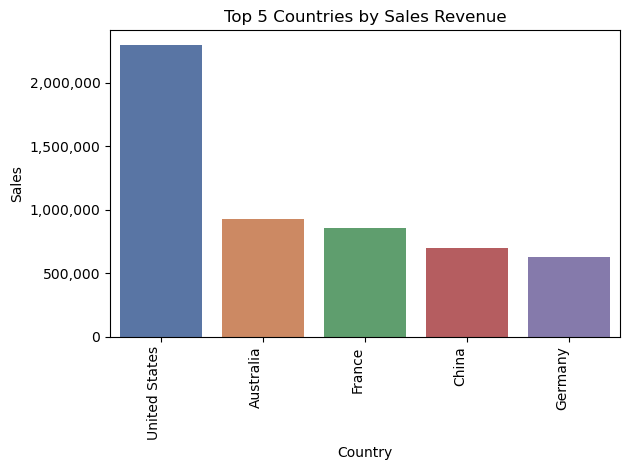

In [26]:
top_sales_countries = pd.DataFrame(df.groupby('Country')['Sales'].sum().astype(float))
top_sales_countries.sort_values('Sales',inplace=True, ascending=False)
top_sales_countries.head(5).style.format({'Sales': '${:,.2f}'})

ax = sns.barplot(x='Country', y='Sales', palette = "deep", data=top_sales_countries.head(5).reset_index())
ax.set_title('Top 5 Countries by Sales Revenue')
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.xticks(rotation = 'vertical')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

## Seasonality: "What are the peak sales months for different product categories?"

In [28]:
df['Year-Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby(['Category', 'Year-Month'])['Sales'].sum().reset_index()
peak_sales_months = monthly_sales.loc[monthly_sales.groupby('Category')['Sales'].idxmax()]
peak_sales_months


,Category,Year-Month,Sales
44,Furniture,2017-09,175776.6427
94,Office Supplies,2017-11,163851.3215
142,Technology,2017-11,222579.0373


## Seasonality: "How do seasonal patterns vary across different markets?"

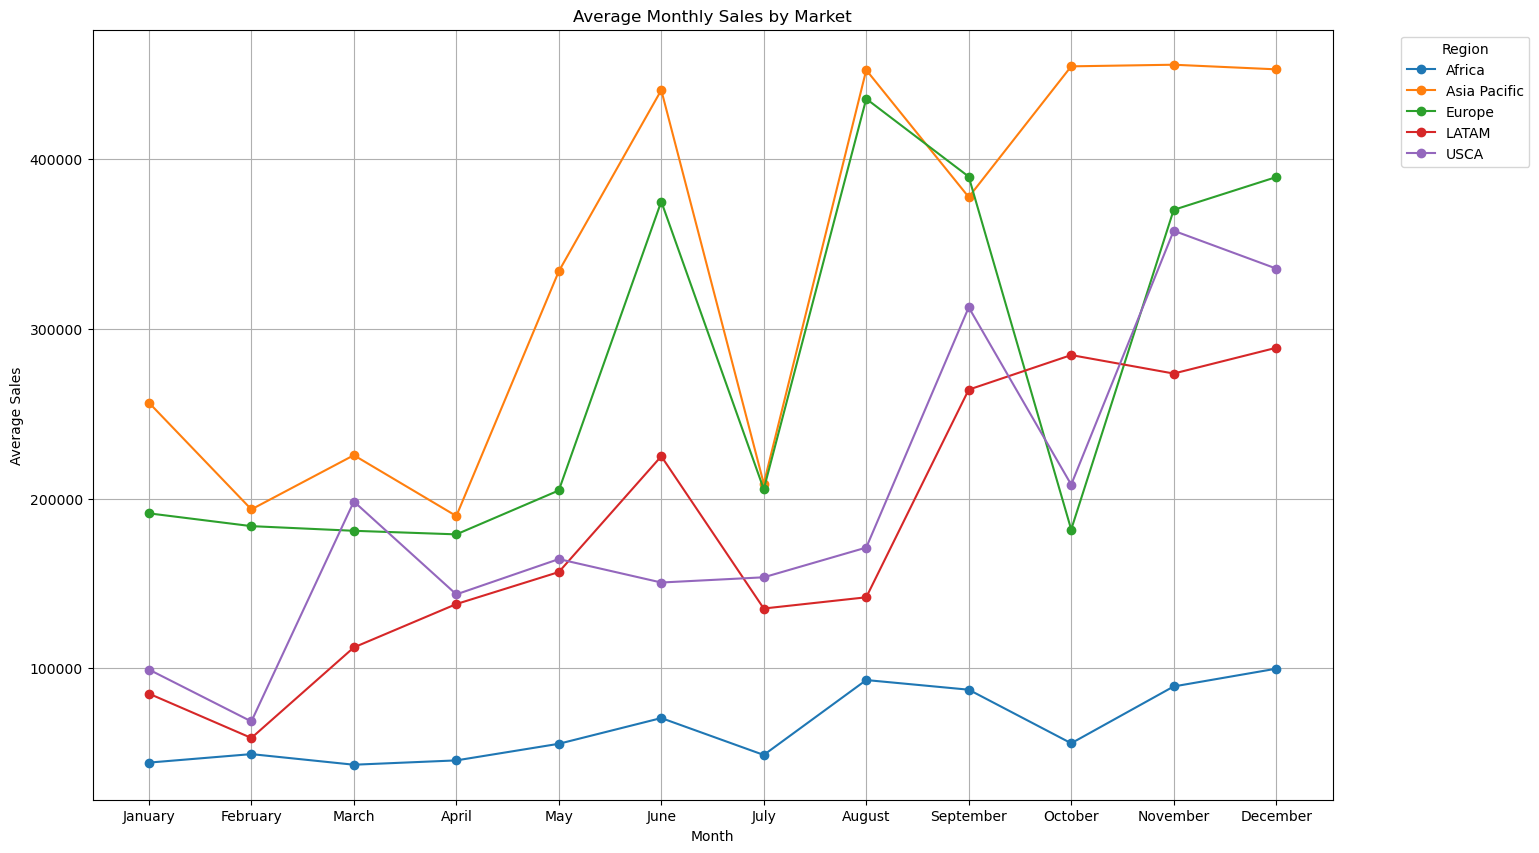

In [30]:
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby(['Market', 'Month'])['Sales'].sum().reset_index()
pivot_table = monthly_sales.pivot(index='Month', columns='Market', values='Sales')
plt.figure(figsize=(16, 10))
for region in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[region], marker='o', label=region)

# Set the x-axis labels to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.title('Average Monthly Sales by Market')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Promotions Strategy: "How do promotional events impact sales in different seasons?"

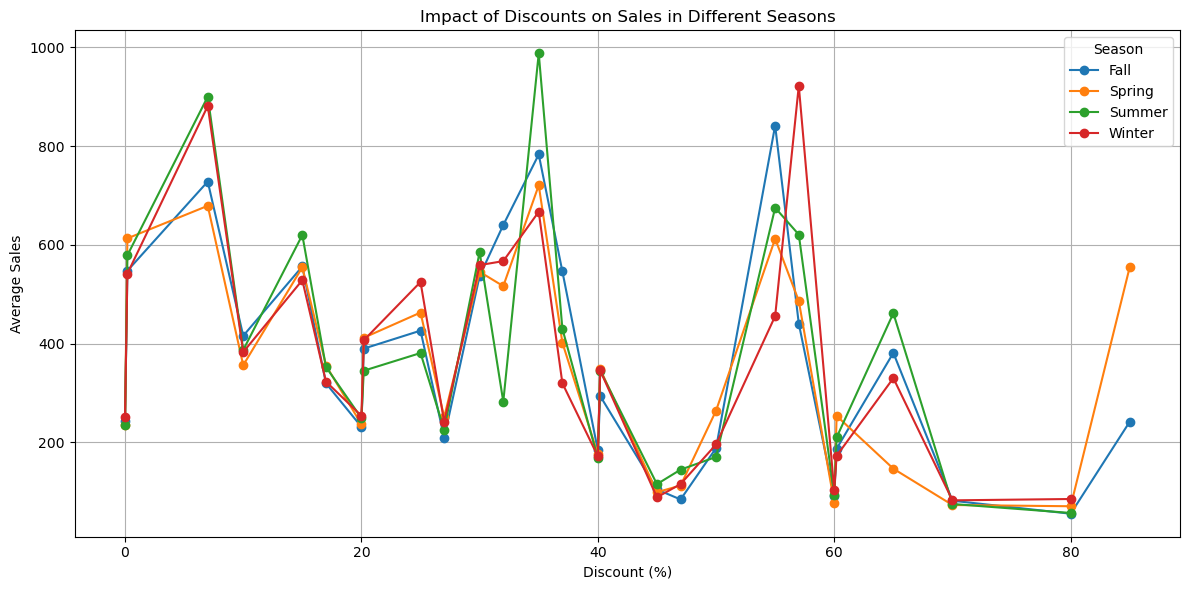

In [32]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add Season column
df['Season'] = df['Month'].apply(get_season)

# Group by promotion status and season, then calculate the average sales
seasonal_discount_sales = df.groupby(['Season', 'Discount'])['Sales'].mean().reset_index()
seasonal_discount_sales['Discount (%)'] = seasonal_discount_sales['Discount'] * 100
pivot_table = seasonal_discount_sales.pivot(index='Discount (%)', columns='Season', values='Sales')
pivot_table.plot(figsize=(12, 6), marker='o')
plt.title('Impact of Discounts on Sales in Different Seasons')
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales')
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()

plt.show()

## Strategy: What products are most likely to see increased demand during the upcoming holiday season?

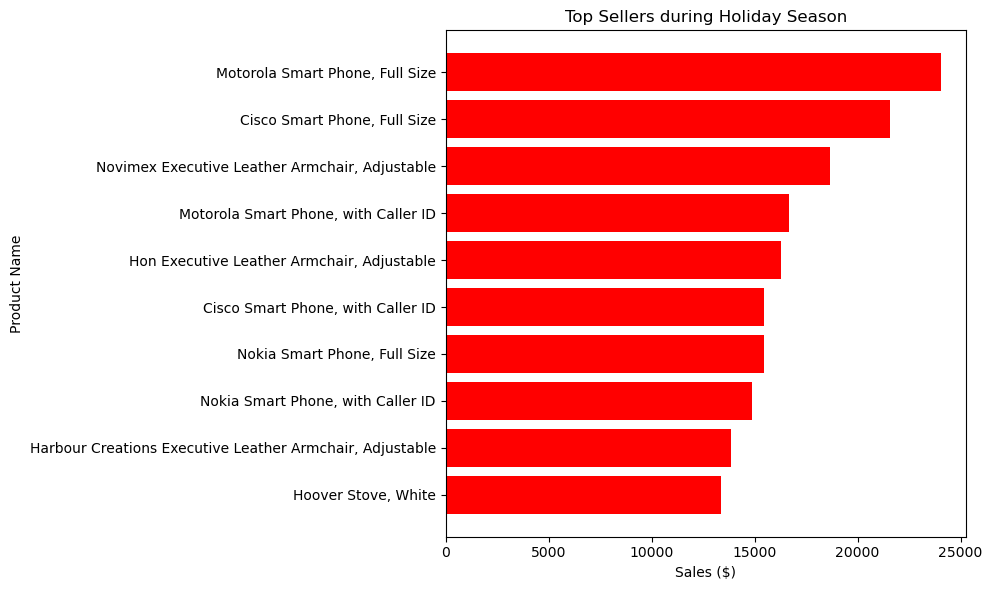

In [34]:
# Extract month and year from Order Date
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Define holiday season months - Nov, Dec - and filter data based on that
holiday_season_months = [11, 12]
holiday_season_data = df[df['Month'].isin(holiday_season_months)]

# Group by product and calculate total sales during the holiday season
product_sales = holiday_season_data.groupby('Product Name')['Sales'].sum().reset_index()

# Sort products by total sales
top_products = product_sales.sort_values(by='Sales', ascending=False).head(10)

# Build chart
plt.figure(figsize=(10, 6))
plt.barh(top_products['Product Name'], top_products['Sales'], color='red')
plt.xlabel('Sales ($)')
plt.ylabel('Product Name')
plt.title('Top Sellers during Holiday Season')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Analyze sales growth or decline by comparing sales data from different years.

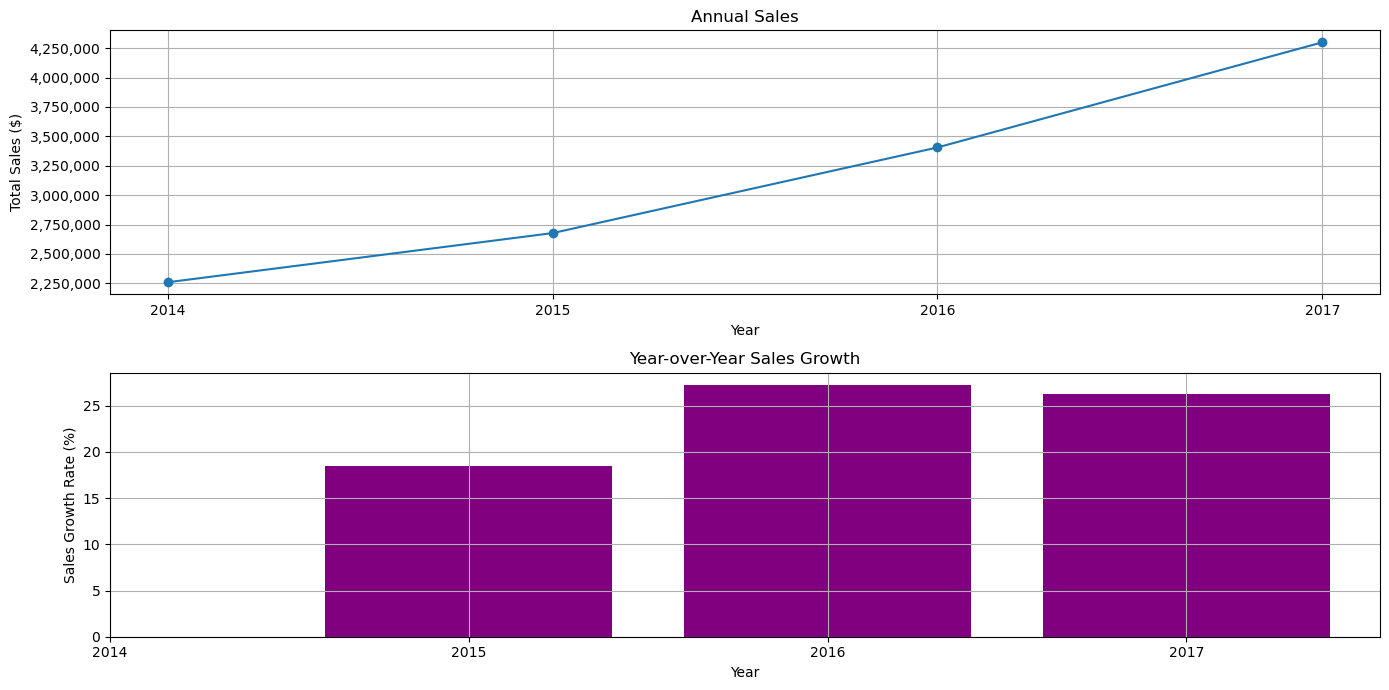

 Year       Sales YoY Growth
 2014 $2259450.90        NaN
 2015 $2677438.69     18.50%
 2016 $3405746.45     27.20%
 2017 $4299865.87     26.25%


In [36]:
annual_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Calculate year over year growth
annual_sales['YoY Growth'] = annual_sales['Sales'].pct_change() * 100

# Plot the annual sales
years = annual_sales['Year'].tolist()
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(annual_sales['Year'], annual_sales['Sales'].astype(float), marker='o')
plt.title('Annual Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(years)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Plot year over year growth
plt.subplot(2, 1, 2)
plt.bar(annual_sales['Year'], annual_sales['YoY Growth'], color='purple')
plt.title('Year-over-Year Sales Growth')
plt.xlabel('Year')
plt.ylabel('Sales Growth Rate (%)')
plt.grid(True)
plt.xticks(years)

plt.tight_layout()
plt.show()

print(annual_sales.to_string(index=False, formatters={
    'Sales': '${:.2f}'.format,
    'YoY Growth': '{:.2f}%'.format
}))

# Data Preprocessing & Analysis

## Category comparison - Technology vs Office Supplies



In [39]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
technology.shape, office.shape

columns = ['Row ID', 'Order ID', 'Product Name',  'Ship Mode', 'Ship Date', 'Customer ID', 'Customer Name', 'Region', 'Segment',  'City', 'State',  'Country', 'Product ID', 'Sub-Category', 'Category', 'Quantity', 'Discount', 'Profit']
technology.drop(columns, axis=1, inplace=True)
office.drop(columns, axis=1, inplace=True)

# Sort the dataframe based on Order Date
technology.sort_values('Order Date')
office.sort_values('Order Date')

# Group the dataframe based on Order Date and Sales, sum daily sales
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')

y_tech = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

technology = pd.DataFrame({'Order Date':y_tech.index, 'Sales':y_tech.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

# Merge for comparison
merged = technology.merge(office, on='Order Date', how='inner')
merged.rename(columns={'Sales_x': 'Technology Sales', 'Sales_y': 'Office Supplies Sales'}, inplace=True)

merged.tail(10)

C:\Users\jorda\AppData\Local\Temp\ipykernel_23936\1458594985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technology.drop(columns, axis=1, inplace=True)
C:\Users\jorda\AppData\Local\Temp\ipykernel_23936\1458594985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office.drop(columns, axis=1, inplace=True)


,Order Date,Technology Sales,Office Supplies Sales
38,2017-03-01,3422.111536,2502.460261
39,2017-04-01,3028.305600,2805.925310
40,2017-05-01,3070.468441,3160.480290
41,2017-06-01,5191.106157,4011.332620
42,2017-07-01,3312.999759,2565.712757
43,2017-08-01,6246.618938,5181.025640
44,2017-09-01,5896.347345,4479.550933
45,2017-10-01,5876.484145,3859.030963
46,2017-11-01,7675.139217,5461.710717
47,2017-12-01,6036.557509,4847.696439


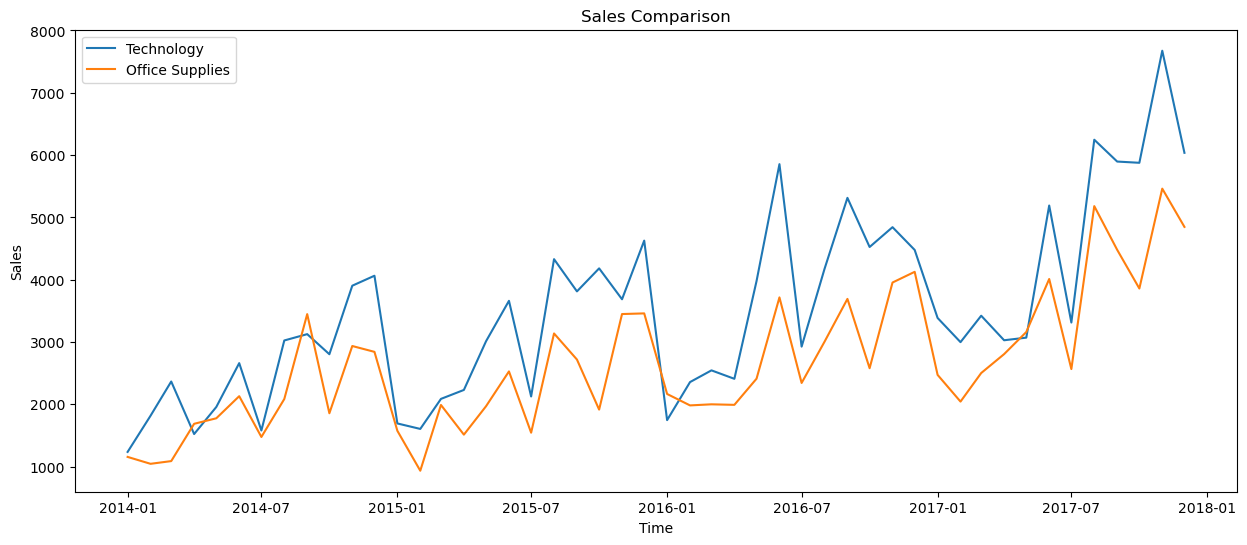

In [40]:
#Visualization

plt.figure(figsize=(15, 6))
plt.plot(merged['Order Date'], merged['Technology Sales'], label='Technology')
plt.plot(merged['Order Date'], merged['Office Supplies Sales'], label='Office Supplies')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales Comparison')
plt.legend()

## Drop columns on main DF and prepare for ML

In [42]:
# Define columns to drop before training the model
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'State', 'Region', 'Product Name',
           'Product ID', 'Shipping Cost',
           'Country', 'City', 'Category', 'Sub-Category',  'Quantity', 'Discount', 'Profit']

# Check to see if columns exist first (so this block can re-run without an error)
columns_to_drop = [col for col in columns if col in df.columns]

# Drop the columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Show structure of remaining dataframe at this point
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  datetime64[ns]
 1   Market          51290 non-null  object        
 2   Sales           51290 non-null  float64       
 3   Order Priority  51290 non-null  object        
 4   Year-Month      51290 non-null  period[M]     
 5   Month           51290 non-null  int32         
 6   Season          51290 non-null  object        
 7   Year            51290 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(3), period[M](1)
memory usage: 2.7+ MB


In [43]:
# Check for null values
df.isna().sum()

Order Date        0
Market            0
Sales             0
Order Priority    0
Year-Month        0
Month             0
Season            0
Year              0
dtype: int64

In [44]:
# Sort the dataframe based on Order Date
df.sort_values('Order Date')

,Order Date,Market,Sales,Order Priority,Year-Month,Month,Season,Year
19088,2014-01-01,Europe,66.120,High,2014-01,1,Winter,2014
1577,2014-01-01,Asia Pacific,120.366,Medium,2014-01,1,Winter,2014
1580,2014-01-01,Asia Pacific,113.670,Medium,2014-01,1,Winter,2014
162,2014-01-01,Africa,408.300,Medium,2014-01,1,Winter,2014
1589,2014-01-01,Asia Pacific,55.242,Medium,2014-01,1,Winter,2014
...,...,...,...,...,...,...,...,...
25728,2017-12-31,LATAM,7.120,Medium,2017-12,12,Winter,2017
44366,2017-12-31,USCA,209.300,Medium,2017-12,12,Winter,2017
43053,2017-12-31,USCA,3.024,Medium,2017-12,12,Winter,2017
19154,2017-12-31,Asia Pacific,276.600,Medium,2017-12,12,Winter,2017


In [45]:
# Group the dataframe based on Order Date and Sales, sum daily sales
df = df.groupby('Order Date')['Sales'].sum().reset_index()

df

,Order Date,Sales
0,2014-01-01,808.56300
1,2014-01-02,314.22000
2,2014-01-03,4503.53720
3,2014-01-04,2808.87024
4,2014-01-05,3662.31000
...,...,...
1424,2017-12-27,13421.26376
1425,2017-12-28,1647.17400
1426,2017-12-29,25109.28878
1427,2017-12-30,16831.61480


## Sales by year

Text(0.5, 1.0, 'Total Sales by Year')

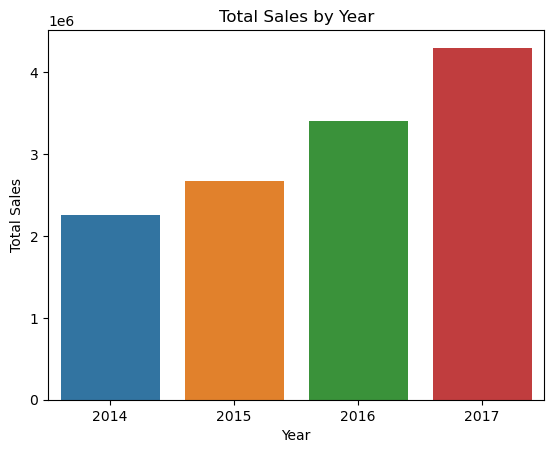

In [47]:
df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum()
sns.barplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

## Sales over time

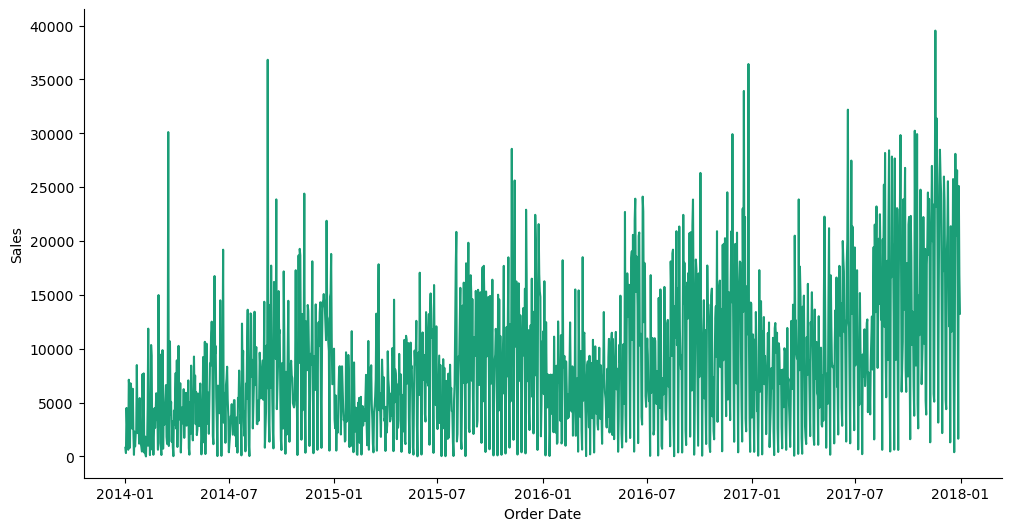

In [49]:
# Show sales over time
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

# Machine Learning Model Set Up and Fitting

In [51]:
# Indexing
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1429, freq=None)

In [52]:
# Resample sales, daily mean grouped by month start
y = df['Sales'].resample('MS').mean()

In [53]:
# Daily average sales starting from 2014 (when dataset begins)
y['2014':]

Order Date
2014-01-01     3190.273834
2014-02-01     3841.404566
2014-03-01     4680.910416
2014-04-01     4234.554192
2014-05-01     5274.277627
2014-06-01     6919.051451
2014-07-01     4083.961539
2014-08-01     7174.595990
2014-09-01     9813.370637
2014-10-01     7203.818916
2014-11-01     9798.245072
2014-12-01    11027.841703
2015-01-01     4581.199171
2015-02-01     3661.294892
2015-03-01     5824.170399
2015-04-01     5553.526535
2015-05-01     6721.448105
2015-06-01     8539.189947
2015-07-01     4841.226171
2015-08-01     9778.804593
2015-09-01     9646.305521
2015-10-01     8159.350006
2015-11-01    10783.747230
2015-12-01    10911.515052
2016-01-01     6425.351851
2016-02-01     6432.294246
2016-03-01     6406.259036
2016-04-01     6350.761316
2016-05-01     8403.179506
2016-06-01    13217.320397
2016-07-01     7417.062968
2016-08-01    10531.896431
2016-09-01    12553.974856
2016-10-01     9464.730415
2016-11-01    12896.184831
2016-12-01    13079.173485
2017-01-01     77

<Axes: xlabel='Order Date'>

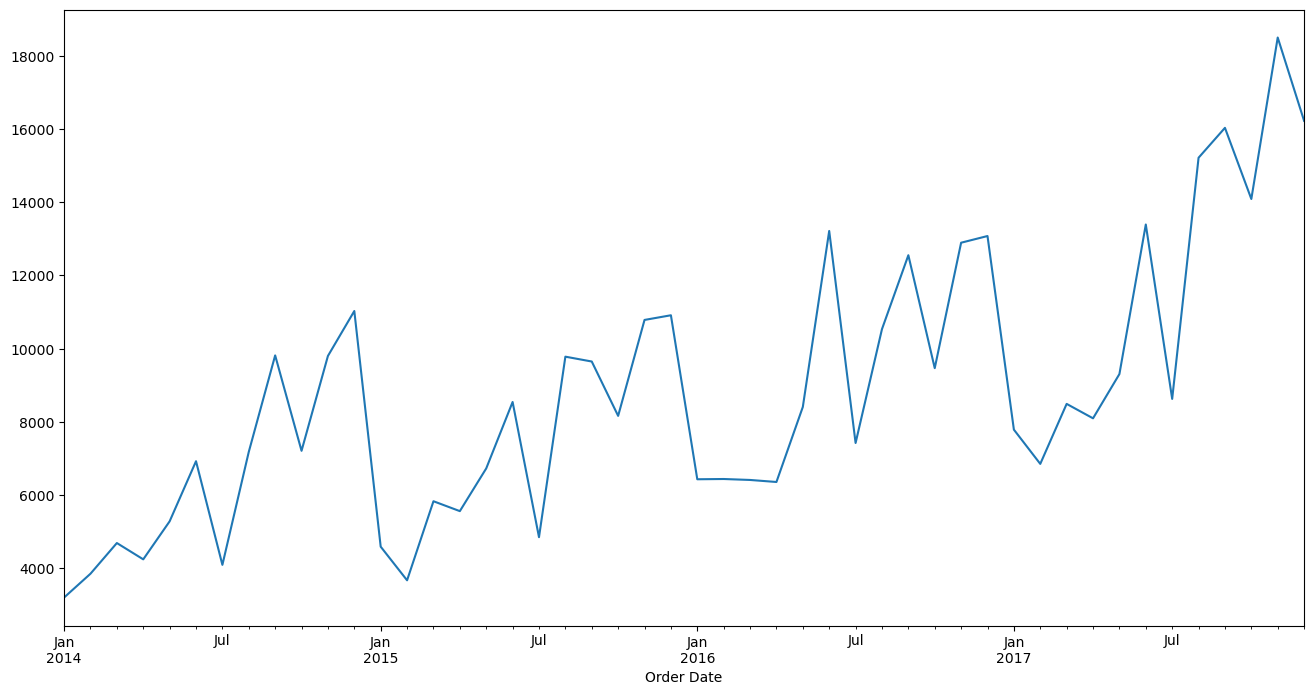

In [54]:
y.plot(figsize=(16, 8))

## Seasonal Decomposition

**Trend**: long-term direction or movement in the data over time

**Seasonal**: The repeating patterns/cycles in data at regular intervals (ie. daily, monthly, yearly)

**Residual**: The remaining noise or irregular component after removing the trend and seasonal effects

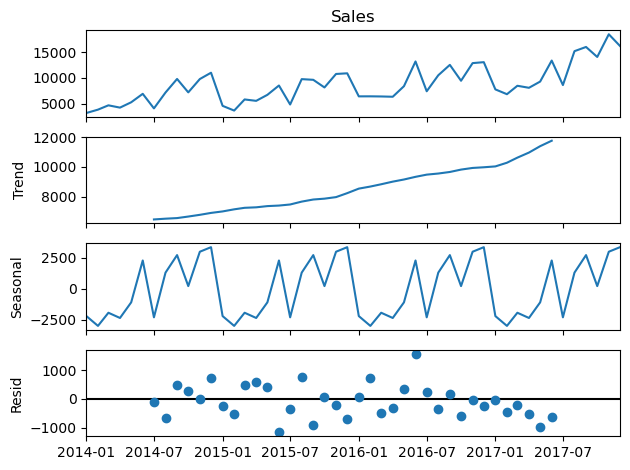

In [57]:
# Seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

## Seasonal AutoRegressive Integrated Moving Average (SARIMA) Model

**P: Seasonal autoregressive order** - incorporate the effect of past values into the model

**D: Seasonal difference order** - amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series

**Q: Seasonal moving average order** -  set the error of the model as a linear combination of the error values observed at previous time points in the past.

**m** - the number of time steps for a single seasonal period.

## Akaike Information Criterion (AIC)

**Akaike information criterion (AIC)** is an estimator of prediction error and relative quality of statistical models for a given dataset
Lowest AIC score: 430, (0, 1, 1, 12)


**p (autoregressive order):** Number of lag observations included in the model

**d (differencing order):** Number of times the raw observations are differenced to make the time series stationary

**q (moving average order):** Number of lagged forecast errors in the prediction equation

## Train model, compare actual/predicted results, forecast future sales

C:\Users\jorda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jorda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jorda\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jorda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters e

ARIMA parameters: (0, 0, 0)x(0, 0, 0, 12) ---> AIC: 997.3519553366862
ARIMA parameters: (0, 0, 0)x(0, 0, 1, 12) ---> AIC: 1719.8052391823971
ARIMA parameters: (0, 0, 0)x(0, 1, 0, 12) ---> AIC: 643.9003527973093
ARIMA parameters: (0, 0, 0)x(0, 1, 1, 12) ---> AIC: 430.63769104497794
ARIMA parameters: (0, 0, 0)x(1, 0, 0, 12) ---> AIC: 624.9367500279056
ARIMA parameters: (0, 0, 0)x(1, 0, 1, 12) ---> AIC: 1315.3388637088208
ARIMA parameters: (0, 0, 0)x(1, 1, 0, 12) ---> AIC: 440.5971342729602
ARIMA parameters: (0, 0, 0)x(1, 1, 1, 12) ---> AIC: 408.36708205502066
ARIMA parameters: (0, 0, 1)x(0, 0, 0, 12) ---> AIC: 950.4463055307331
ARIMA parameters: (0, 0, 1)x(0, 0, 1, 12) ---> AIC: 3341.1143857577426
ARIMA parameters: (0, 0, 1)x(0, 1, 0, 12) ---> AIC: 608.3717340472283
ARIMA parameters: (0, 0, 1)x(0, 1, 1, 12) ---> AIC: 400.2452805679001
ARIMA parameters: (0, 0, 1)x(1, 0, 0, 12) ---> AIC: 623.793403020025
ARIMA parameters: (0, 0, 1)x(1, 0, 1, 12) ---> AIC: 3111.2267280020733
ARIMA parameter

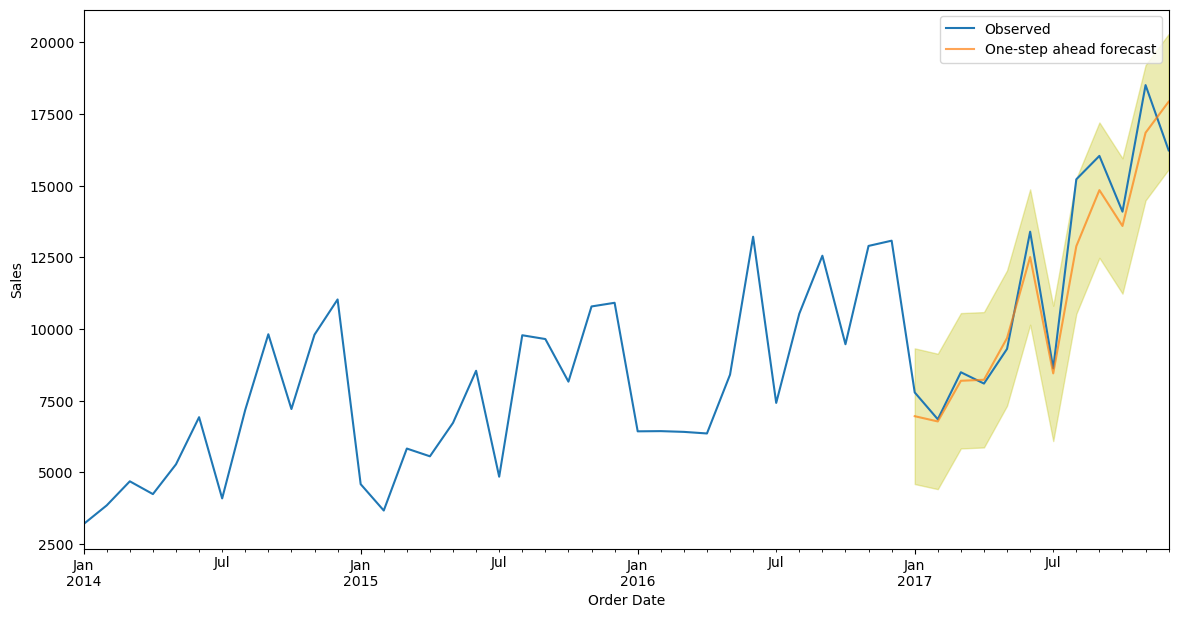

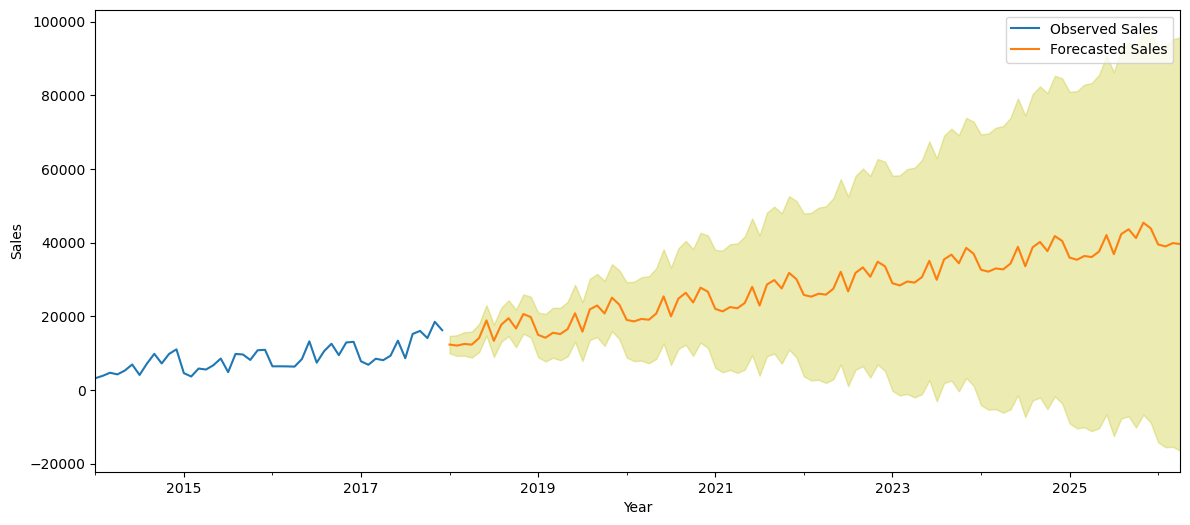

In [63]:
# Define ranges for p, d, q
p = d = q = range(0, 2)

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Generate all combinations of seasonal (p, d, q, s)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Function to fit and evaluate a SARIMA model
@delayed
def evaluate_model(y, param, param_seasonal):
    try:
        model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        return (results.aic, param, param_seasonal, results)
    except Exception as e:
        return (float("inf"), param, param_seasonal, None)

# Check the length of the time series data
min_length = max(p) + max(d) + max(q) + 12

if len(y) < min_length:
    print("The length of the time series data is too short for the given parameter ranges")
else:
    # Create a list to hold all the delayed evaluation tasks
    tasks = [evaluate_model(y, param, param_seasonal) for param in pdq for param_seasonal in seasonal_pdq]

    # Compute the results in parallel
    results = compute(*tasks)

    # Find the best model based on AIC
    best_aic = float("inf")
    best_param = None
    best_param_seasonal = None
    best_model = None

    for result in results:
        aic, param, param_seasonal, model = result
        if aic < best_aic:
            best_aic = aic
            best_param = param
            best_param_seasonal = param_seasonal
            best_model = model

        # Output the parameters and their corresponding AIC value
        print(f'ARIMA parameters: {param}x{param_seasonal} ---> AIC: {aic}')

    # Print the best model parameters and AIC
    print(f'Best ARIMA parameters: {best_param}x{best_param_seasonal} ---> AIC: {best_aic}')

    # Show the best model results
    if best_model is not None:
        best_model_summary = best_model.summary()
        print(best_model_summary)

        # Get predictions from the best model
        pred = best_model.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

        # Calculate the confidence intervals for the predictions
        pred_ci = pred.conf_int()

        # Print confidence intervals
        print("Confidence intervals for predictions:")
        print(pred_ci)

        # Plot actual sales and predicted sales
        ax = y['2014':].plot(label='Observed')

        # Overlay predicted sales
        pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7, figsize=(14, 7))

        # Shade the area between the lower and upper confidence interval bounds
        ax.fill_between(pred_ci.index,
                        pred_ci.iloc[:, 0],
                        pred_ci.iloc[:, 1], color='y', alpha=.3)

        ax.set_ylabel('Sales')
        ax.set_xlabel('Order Date')
        plt.legend()
        plt.show()

        # Generate forecasts for next 100 time steps
        pred_uc = best_model.get_forecast(steps=100)

        # Calculate confidence intervals
        pred_ci = pred_uc.conf_int()

        # Plot observed sales data
        ax = y.plot(label='Observed Sales', figsize=(14, 6))

        # Plot the forecasted mean sales values
        pred_uc.predicted_mean.plot(ax=ax, label='Forecasted Sales')

        # Shade the area between the lower and upper confidence interval bounds
        ax.fill_between(pred_ci.index,
                        pred_ci.iloc[:, 0],
                        pred_ci.iloc[:, 1], color='y', alpha=0.3)

        ax.set_ylabel('Sales')
        ax.set_xlabel('Year')
        plt.legend()
        plt.show()
    else:
        print("No valid model was found.")

## Testing model accuracy and performance (MSE, RMSE)


In [65]:
# Predicted mean values of sales generated by SARIMA model
y_predicted = pred.predicted_mean

# Original sales data
y_true = y['2017-01-01':]

# Squared difference between each predicted value, and the corresponding true value
mse = ((y_predicted - y_true)**2).mean()
print('Mean square error (MSE):', round(mse, 3))

print('Root mean square error (RMSE):', round(np.sqrt(mse), 3))

Mean square error (MSE): 1211677.361
Root mean square error (RMSE): 1100.762
